# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Load Data 

In [2]:
df = pd.read_csv('ai_job_market_insights.csv')
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [3]:
#Viewing the Information of Table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [10]:
df.columns = df.columns.str.replace('_', ' ').str.title()
df

,Job Title,Industry,Company Size,Location,Ai Adoption Level,Automation Risk,Required Skills,Salary Usd,Remote Friendly,Job Growth Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.17,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.26,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.95,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.92,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.39,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.99,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.93,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.15,Yes,Stable


In [9]:
#Converting's 
df['Salary Usd'] = round(df['Salary Usd'].astype(float),2)

In [13]:
df['Job Title'].nunique()

10

In [16]:
df.duplicated().sum()

0

# EDA

### Job Title 

In [60]:
df['Job Title'].value_counts().sort_values(ascending=False)
df['Job Growth Projection'].value_counts().sort_values(ascending=False)

Growth     169
Decline    169
Stable     162
Name: Job Growth Projection, dtype: int64

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

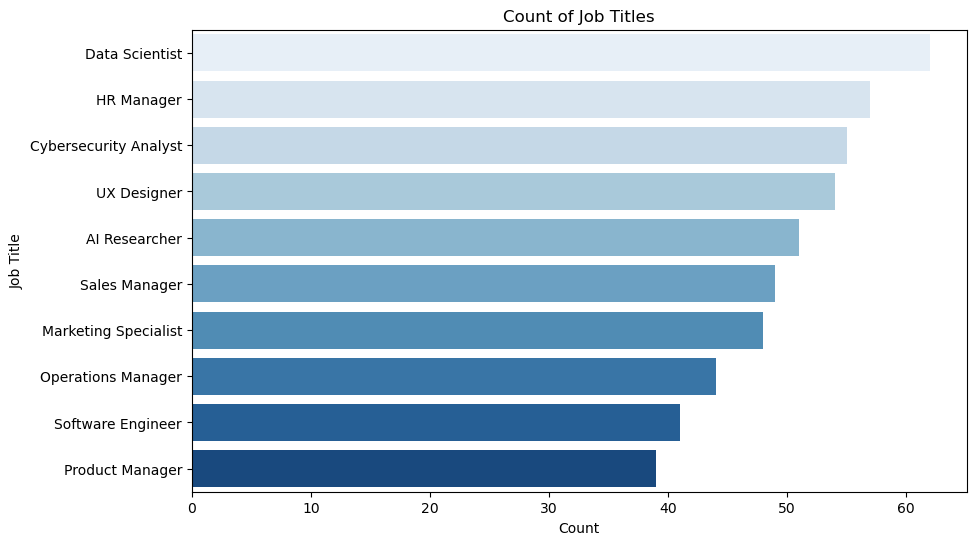

In [65]:
#Visualization Job Title's Distributed Count
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y='Job Title',
    order=df['Job Title'].value_counts().index,
    palette='Blues',
    hue=None
)
plt.title('Count of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')

plt.show()

### Industry

In [36]:
df['Industry'].value_counts().sort_values(ascending=False)

Manufacturing         58
Education             57
Technology            56
Finance               53
Telecommunications    53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: Industry, dtype: int64

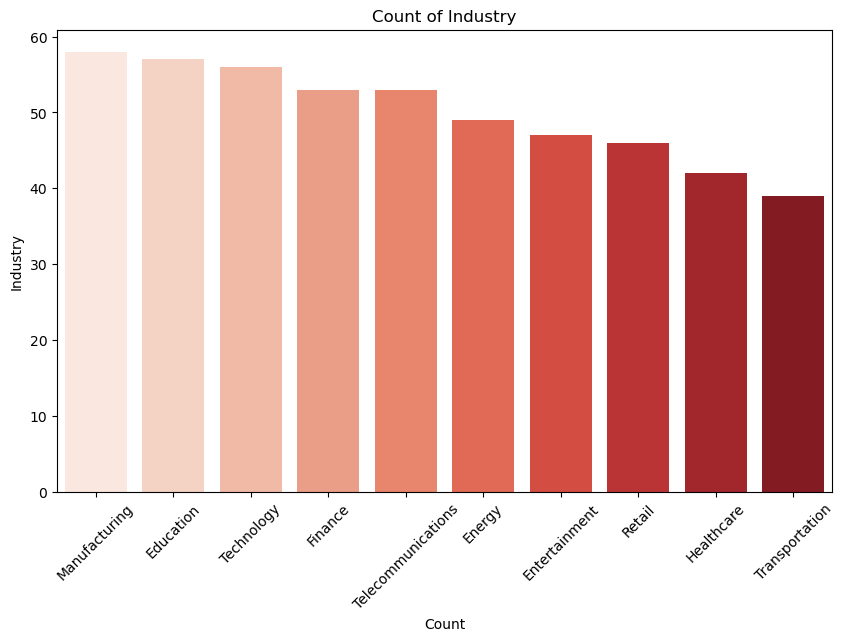

In [51]:
#Visualization Job Title's Distributed Count
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Industry', order=df['Industry'].value_counts().index, palette='Reds')
plt.title('Count of Industry')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.xticks(rotation=45)

plt.show()

In [67]:
df['Company Size'].unique()

array(['Small', 'Large', 'Medium'], dtype=object)

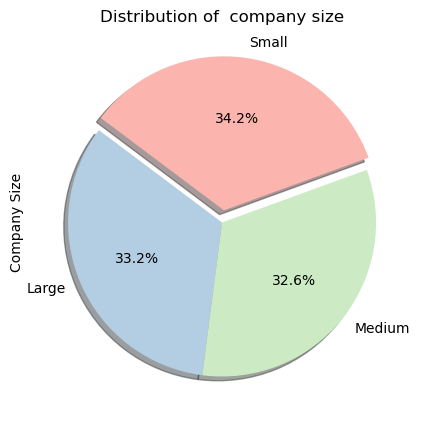

In [68]:
colors = plt.get_cmap('Pastel1').colors
df["Company Size"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  company size', explode=(0.08,0,0 ) , shadow=True , colors=colors)
plt.show()

In [72]:
combine = df.groupby(['Job Title', 'Company Size']).size().unstack()

<Figure size 1000x600 with 0 Axes>

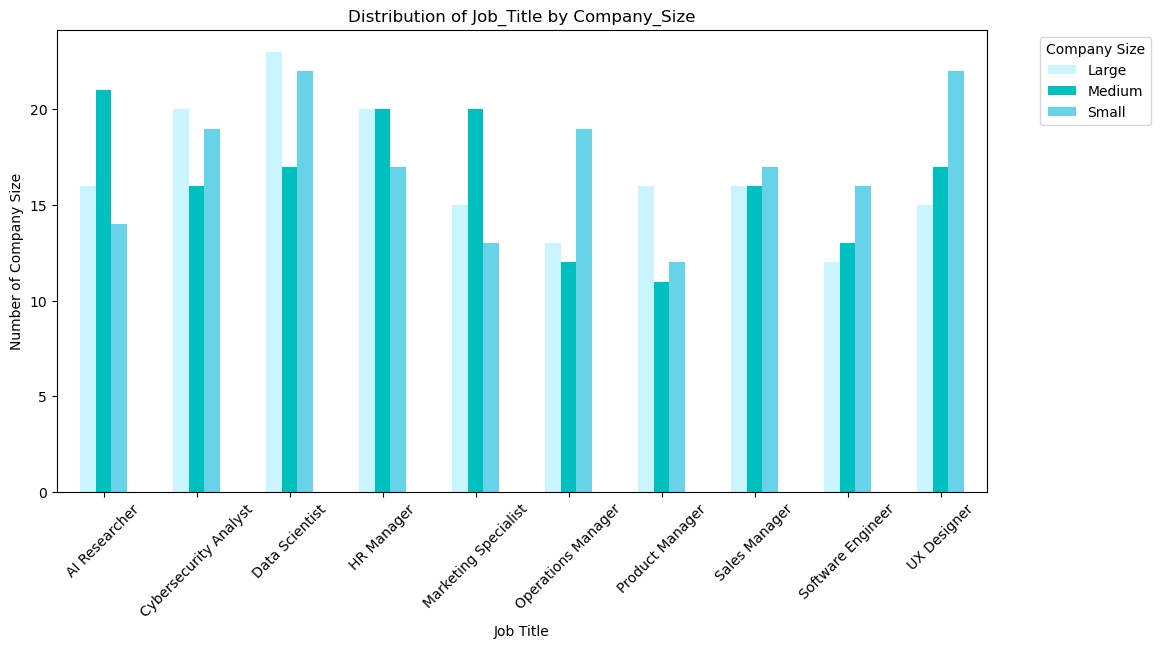

In [87]:
plt.figure(figsize=(10, 6))
combine.plot(kind='bar', figsize=(12,6), color=["#CAF4FF" ,"c"  ,"#68D2E8"])
plt.title('Distribution of Job_Title by Company_Size')
plt.xlabel('Job Title')
plt.ylabel('Number of Company Size')
plt.xticks(rotation=45)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show();

In [88]:
df.Location.unique()

array(['Dubai', 'Singapore', 'Berlin', 'Tokyo', 'San Francisco', 'London',
       'Paris', 'Sydney', 'New York', 'Toronto'], dtype=object)

In [90]:
df.groupby("Company Size")["Location"].value_counts().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Company Size,,,,,,,,,,
Large,18,13,14,19,15,18,17,14,19,19
Medium,19,17,15,11,14,19,20,20,14,14
Small,11,21,17,19,17,25,17,18,18,8


In [92]:
df.groupby("Job Title")["Location"].value_counts().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Job Title,,,,,,,,,,
AI Researcher,2,3,3,6,2,10,8,5,5,7
Cybersecurity Analyst,7,9,8,6,4,4,3,7,3,4
Data Scientist,7,6,5,8,4,6,5,8,8,5
HR Manager,5,4,8,6,8,7,6,3,5,5
Marketing Specialist,6,5,4,2,6,9,6,3,6,1
Operations Manager,7,6,5,4,2,7,4,4,4,1
Product Manager,4,2,3,2,4,6,3,5,5,5
Sales Manager,5,3,6,3,5,5,7,5,3,7
Software Engineer,2,5,3,5,4,3,6,6,5,2


In [93]:
df.groupby("Industry")["Location"].value_counts().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Industry,,,,,,,,,,
Education,6,4,6,7,5,6,6,5,7,5
Energy,6,5,3,6,3,6,9,4,3,4
Entertainment,6,3,3,5,4,3,9,5,7,2
Finance,1,4,4,3,5,12,6,3,8,7
Healthcare,5,7,4,1,9,4,2,6,3,1
Manufacturing,4,5,8,7,8,6,4,8,6,2
Retail,5,5,4,5,2,6,3,7,5,4
Technology,5,5,5,6,4,8,7,5,5,6
Telecommunications,8,7,6,7,1,5,3,6,5,5


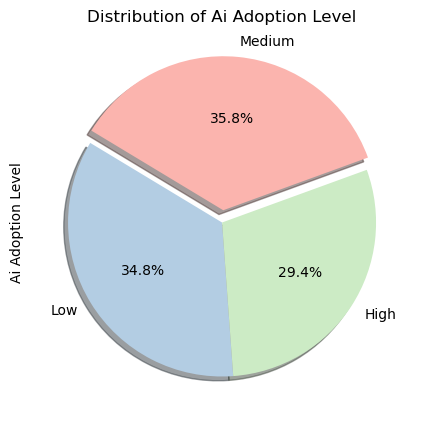

In [94]:
colors = plt.get_cmap('Pastel1').colors
df["Ai Adoption Level"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of Ai Adoption Level', explode=(0.08,0,0 ) , shadow=True , colors=colors)
plt.show()

In [95]:
df.head()

,Job Title,Industry,Company Size,Location,Ai Adoption Level,Automation Risk,Required Skills,Salary Usd,Remote Friendly,Job Growth Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.17,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.26,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.95,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.92,Yes,Decline


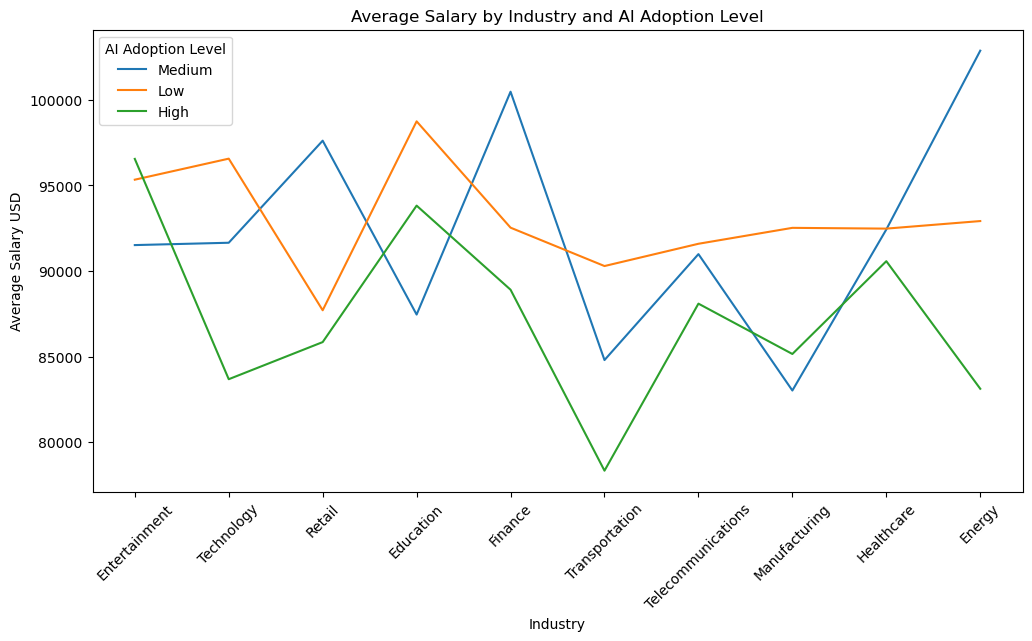

In [104]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Industry', y='Salary Usd', hue='Ai Adoption Level', ci=None)
plt.title('Average Salary by Industry and AI Adoption Level')
plt.xlabel('Industry')
plt.ylabel('Average Salary USD')
plt.xticks(rotation=45)
plt.legend(title='AI Adoption Level')
plt.show()

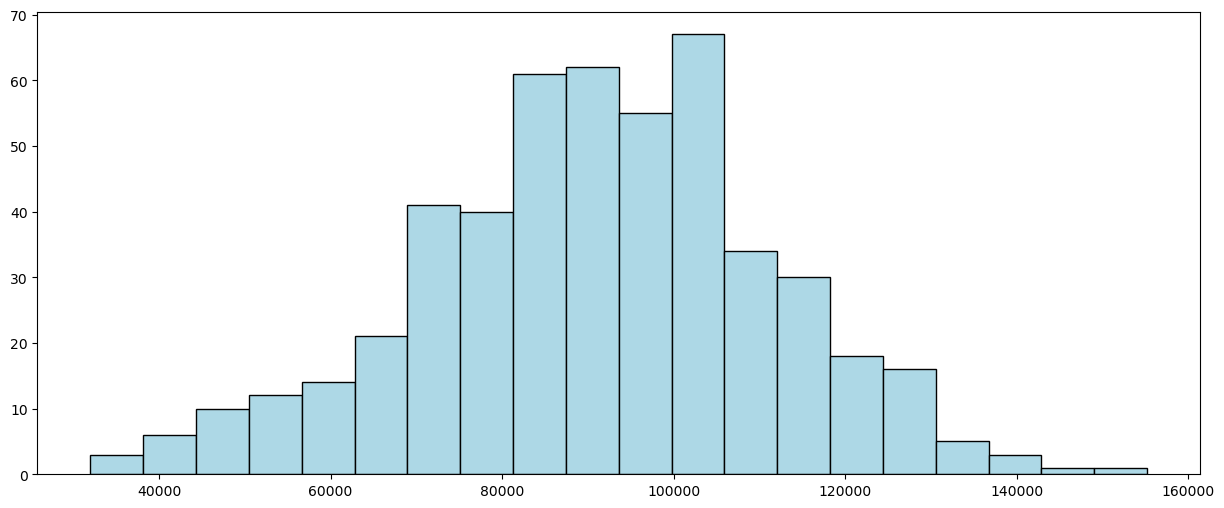

In [108]:
plt.figure(figsize=(15, 6))
plt.hist(df['Salary Usd'], bins=20, color='lightblue', edgecolor='black')

plt.show()

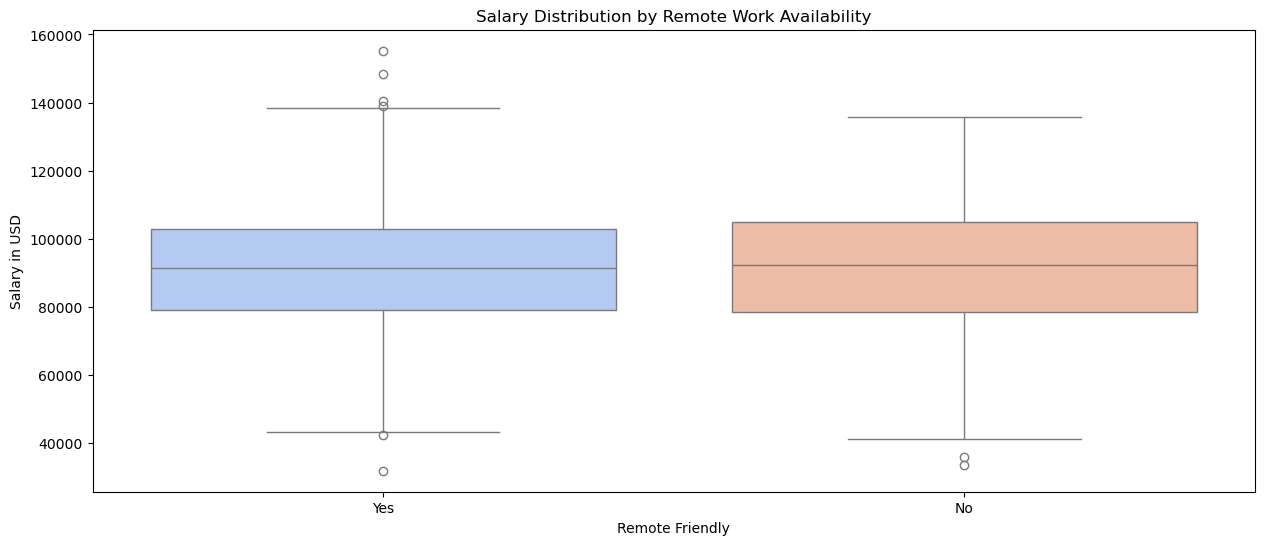

In [113]:
#Visualization Outlier between Salary and Remoted Friendly
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Remote Friendly', y='Salary Usd', palette='coolwarm')
plt.title('Salary Distribution by Remote Work Availability')
plt.xlabel('Remote Friendly')
plt.ylabel('Salary in USD')
plt.show()

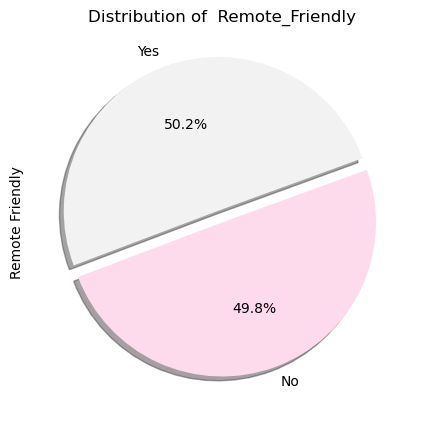

In [114]:
colors = plt.get_cmap('Pastel1_r').colors
df["Remote Friendly"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  Remote_Friendly', explode=(0.08,0 ) , shadow=True , colors=colors)
plt.show()